In [13]:
import pandas as pd
import statsmodels.formula.api as smf
import itertools
import sys
sys.path.append('../machine_learning')
from utils import continuous_variables
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


df = pd.read_csv('../resources/data/generated/buildings_model_features.csv')
df

highest_elevation_m      area_m2  sub_buildings  graffiti_count  \
0                    56.17  4457.030151             11             2.0   
1                    56.17  4457.030151             11             0.0   
2                    56.17  4457.030151             11             0.0   
3                    56.17  4457.030151             11             7.0   
4                    56.17  4457.030151             11             4.0   
...                    ...          ...            ...             ...   
72960               118.09    71.319601              1             0.0   
72961               114.47   209.131803              1             0.0   
72962               114.91   105.641870              1             0.0   
72963               115.32   146.877902              1             0.0   
72964               100.52   996.885601              1             0.0   

       one_house_away_buildings_count  one_house_away_graffiti_count  \
0                                   0                            0.0   
1                                   2                            7.0   
2                                   1                            0.0   
3                                   2                            7.0   
4                                   2                            9.0   
...                               ...                            ...   
72960                               2                            0.0   
72961                               1                            0.0   
72962                               1                            0.0   
72963                               1                            0.0   
72964                               0                            0.0   

       one_house_away_graffiti_average  one_house_away_graffiti_buildings  \
0                                  0.0                                  0   
1                                  3.5                                  1   
2                                  0.0                                  0   
3                                  3.5                                  1   
4                                  4.5                                  2   
...                                ...                                ...   
72960                              0.0                                  0   
72961                              0.0                                  0   
72962                              0.0                                  0   
72963                              0.0                                  0   
72964                              0.0                                  0   

       one_house_away_buildings_average_height  \
0                                        0.000   
1                                       56.170   
2                                       56.170   
3                                       56.170   
4                                       56.170   
...                                        ...   
72960                                  117.065   
72961                                  115.760   
72962                                  114.660   
72963                                  115.220   
72964                                    0.000   

       one_house_away_buildings_median_height  ...  geo_local_area_area_m2  \
0                                       0.000  ...              8330704.78   
1                                      56.170  ...              8330704.78   
2                                      56.170  ...              8330704.78   
3                                      56.170  ...              8330704.78   
4                                      56.170  ...              8330704.78   
...                                       ...  ...                     ...   
72960                                 117.065  ...              6932819.53   
72961                                 115.760  ...              6932819.53   
72962                    

In [14]:
df.describe()

highest_elevation_m       area_m2  sub_buildings  graffiti_count  \
count         72965.000000  72965.000000   72965.000000    72965.000000   
mean             66.727853    412.579616       1.538313        0.266854   
std              27.058351   1105.285292       2.207427        1.349707   
min               4.790000     25.331665       1.000000        0.000000   
25%              45.600000    101.252780       1.000000        0.000000   
50%              67.150000    133.367433       1.000000        0.000000   
75%              89.520000    183.245091       1.000000        0.000000   
max             223.710000  54227.841295      60.000000       35.000000   

       one_house_away_buildings_count  one_house_away_graffiti_count  \
count                    72965.000000                   72965.000000   
mean                         1.702090                       0.501309   
std                          1.089791                       3.048547   
min                          0.000000                       0.000000   
25%                          1.000000                       0.000000   
50%                          2.000000                       0.000000   
75%                          2.000000                       0.000000   
max                          7.000000                      83.000000   

       one_house_away_graffiti_average  one_house_away_graffiti_buildings  \
count                     72965.000000                       72965.000000   
mean                          0.209417                           0.138998   
std                           1.128608                           0.570316   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           0.000000                           0.000000   
75%                           0.000000                           0.000000   
max                          35.000000                           7.000000   

       one_house_away_buildings_average_height  \
count                             72965.000000   
mean                                 57.678872   
std                                  34.197706   
min                                   0.000000   
25%                                  32.050000   
50%                                  60.810000   
75%                                  86.233333   
max                                 223.710000   

       one_house_away_buildings_median_height  ...  geo_local_area_area_m2  \
count                            72965.000000  ...            7.296500e+04   
mean                                57.679875  ...            6.236873e+06   
std                                 34.198015  ...            1.707705e+06   
min                                  0.000000  ...            2.175940e+06   
25%                                 32.050000  ...            4.930726e+06   
50%                                 60.815000  ...            6.361709e+06   
75%                                 86.240000  ...            7.251126e+06   
max                                223.710000  ...            9.078142e+06   

       geo_local_area_population   pop_density  roof_type_Complex  \
count               72965.000000  72965.000000       72965.000000   
mean                32446.070719      0.005415           0.030604   
std                 13595.907825      0.002748           0.172243   
min                  7970.000000      0.001882           0.000000   
25%                 22555.000000      0.004075           0.000000   
50%                 32955.000000      0.005552           0.000000   
75%                 43045.000000      0.006363           0.000000   
max                 62030.000000      0.020924           1.000000   

       roof_type_Flat  roof_type_Pitched  street_type_arterial  \
count    72965.000000       72965.000000          72965.000000   
mean         0.260495           0.708902              0.113136   
std          0

In [15]:
y = df['graffiti_count']
x = set(df.columns)
x.remove('graffiti_count')
x = list(x)


singular_variables = ' + '.join(x)
formula = "graffiti_count ~ " + singular_variables

fit = smf.ols(formula, data=df).fit()

summary = fit.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         graffiti_count   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2720.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:14:42   Log-Likelihood:                -91559.
No. Observations:               72965   AIC:                         1.832e+05
Df Residuals:                   72923   BIC:                         1.836e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.0949      0.017      5.467      0.000       0.061       0.129
one_house_away_buildings_median_sub_buildings        0.0066      0.054      0.122      0.903      -0.099       0.112
pop_density                                         -7.6805      2.763     -2.780      0.005     -13.096      -2.265
one_house_away_buildings_count                      -0.0227      0.005     -4.502      0.000      -0.033      -0.013
four_houses_away_buildings_count                     0.0017      0.001      2.480      0.013       0.000       0.003
geo_local_area_area_m2                           -1.731e-09   3.46e-09     -0.501      0.617   -8.51e-09    5.05e-09
roof_type_Pitched                                   -0.0063      0.008     -0.786      0.432      -0.022       0.009
two_houses_away_buildings_median_height             -0.0089      0.003     -3.004      0.003      -0.015      -0.003
two_houses_away_buildings_total_sub_buildings        0.0042      0.001      4.151      0.000       0.002       0.006
four_houses_away_buildings_median_sub_buildings     -0.0153      0.006     -2.772      0.006      -0.026      -0.004
street_type_arterial                                 0.1683      0.012     14.567      0.000       0.146       0.191
two_houses_away_buildings_median_sub_buildings       0.0051      0.008      0.661      0.509      -0.010       0.020
street_type_secondary_arterial                       0.0038      0.012      0.309      0.757      -0.020       0.028
roof_type_Complex                                    0.0016      0.015      0.111      0.912      -0.027       0.030
two_houses_away_buildings_average_sub_buildings     -0.0457      0.009     -4.827      0.000      -0.064      -0.027
street_type_collector                               -0.0280      0.020     -1.392      0.164      -0.067       0.011
one_house_away_buildings_average_sub_buildings      -0.0760      0.054     -1.414      0.158      -0.181       0.029
two_houses_away_graffiti_average                     0.2722      0.009     30.337      0.000       0.255       0.290
two_houses_away_graffiti_buildings                   0.0101      0.008      1.189      0.234      -0.007       0.027
four_houses_away_buildings_average_height           -0.0030      0.002     -1.399      0.162      -0.007       0.001
four_houses_away_buildings_average_sub_buildings    -0.0019      0.008     -0.227      0.821      -0.018       0.014
four_houses_away_street_lights                      -0.0052      0.001     -6.066      0.000      -0.007      -0.004
four_houses_away_buildings_total_sub_buildings       0.0002      0.000      0.786      0.432      -0.000       0.001
one_house_away_buildings_median_height   

In [16]:
# source: https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe

def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"p":pvals,
                               "coef":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coef","p","conf_lower","conf_higher"]]
    return results_df

df_summary = results_summary_to_dataframe(fit)
df_summary

coef              p  \
Intercept                                         9.489410e-02   4.598416e-08   
one_house_away_buildings_median_sub_buildings     6.565420e-03   9.025338e-01   
pop_density                                      -7.680472e+00   5.443894e-03   
one_house_away_buildings_count                   -2.272772e-02   6.757226e-06   
four_houses_away_buildings_count                  1.677200e-03   1.314726e-02   
geo_local_area_area_m2                           -1.730929e-09   6.167198e-01   
roof_type_Pitched                                -6.336357e-03   4.315893e-01   
two_houses_away_buildings_median_height          -8.863795e-03   2.663006e-03   
two_houses_away_buildings_total_sub_buildings     4.190894e-03   3.319627e-05   
four_houses_away_buildings_median_sub_buildings  -1.530170e-02   5.580381e-03   
street_type_arterial                              1.682755e-01   5.318676e-48   
two_houses_away_buildings_median_sub_buildings    5.139728e-03   5.085714e-01   
street_type_secondary_arterial                    3.774399e-03   7.572011e-01   
roof_type_Complex                                 1.607066e-03   9.119479e-01   
two_houses_away_buildings_average_sub_buildings  -4.566600e-02   1.385518e-06   
street_type_collector                            -2.802055e-02   1.638098e-01   
one_house_away_buildings_average_sub_buildings   -7.603623e-02   1.575128e-01   
two_houses_away_graffiti_average                  2.722304e-01  6.765318e-201   
two_houses_away_graffiti_buildings                1.007573e-02   2.344975e-01   
four_houses_away_buildings_average_height        -2.967544e-03   1.617405e-01   
four_houses_away_buildings_average_sub_buildings -1.890555e-03   8.208022e-01   
four_houses_away_street_lights                   -5.230762e-03   1.320492e-09   
four_houses_away_buildings_total_sub_buildings    2.452643e-04   4.319653e-01   
one_house_away_buildings_median_height            3.314188e-02   2.752970e-02   
four_houses_away_buildings_median_height          6.184995e-03   1.517193e-03   
one_house_away_buildings_average_height          -3.248957e-02   3.074008e-02   
area_m2                                           1.108090e-05   4.608134e-02   
street_type_residential                          -4.913524e-02   4.032661e-10   
one_house_away_graffiti_buildings                -1.150799e-01   6.398270e-15   
two_houses_away_buildings_count                  -8.458622e-03   4.329114e-04   
two_houses_away_buildings_average_height          9.898317e-03   9.197391e-04   
four_houses_away_graffiti_count                  -1.649713e-03   6.597080e-03   
two_houses_away_graffiti_count                   -1.462546e-02   2.299723e-15   
geo_local_area_population                         3.597299e-07   5.385244e-01   
one_house_away_street_lights                      2.632013e-02   5.068809e-08   
four_houses_away_graffiti_average                 3.134469e-01  5.111768e-165   
four_houses_away_graffiti_buildings               1.209313e-02   6.173598e-06   
one_house_away_buildings_total_sub_buildings     -7.969013e-03   1.006268e-04   
two_houses_away_street_lights                     2.534703e-02   1.850646e-23   
highest_elevation_m                              -5.009333e-03   7.983727e-12   
one_house_away_graffiti_average                   4.604513e-01   0.000000e+00   
sub_buildings                                     9.306184e-02   5.483343e-93   
one_house_away_graffiti_count                     4.053294e-02   1.590403e-33   
roof_type_Flat                                    9.962339e-02   6.338187e-28   

                                                    conf_lower   conf_higher  
Intercept                                         6.087171e-02  1.289165e-01  
one_house_away_buildings_median_sub_buildings    -9.851400e-02  1.116448e-01  
pop_density                                      -1.309624e+01 -2.264704e+00  
one_house_away_buildings_count                   -3.262354e-02 -1.283190e-02  
four_houses_away_

In [20]:
df_summary = df_summary.drop('Intercept')
df_summary['p'] = df_summary['p'].astype(float)
df_summary = df_summary[df_summary['p'] < 0.05]
df_summary = df_summary.sort_values('p', ascending=True)
df_summary['coef'] = df_summary['coef'].round(5)
df_summary['abs_coef'] = df_summary['coef'].apply(abs)
df_summary = df_summary.sort_values('abs_coef', ascending=False)
df_summary['coef']

pop_density                                       -7.68047
one_house_away_graffiti_average                    0.46045
four_houses_away_graffiti_average                  0.31345
two_houses_away_graffiti_average                   0.27223
street_type_arterial                               0.16828
one_house_away_graffiti_buildings                 -0.11508
roof_type_Flat                                     0.09962
sub_buildings                                      0.09306
street_type_residential                           -0.04914
two_houses_away_buildings_average_sub_buildings   -0.04567
one_house_away_graffiti_count                      0.04053
one_house_away_buildings_median_height             0.03314
one_house_away_buildings_average_height           -0.03249
one_house_away_street_lights                       0.02632
two_houses_away_street_lights                      0.02535
one_house_away_buildings_count                    -0.02273
four_houses_away_buildings_median_sub_buildings   -0.015

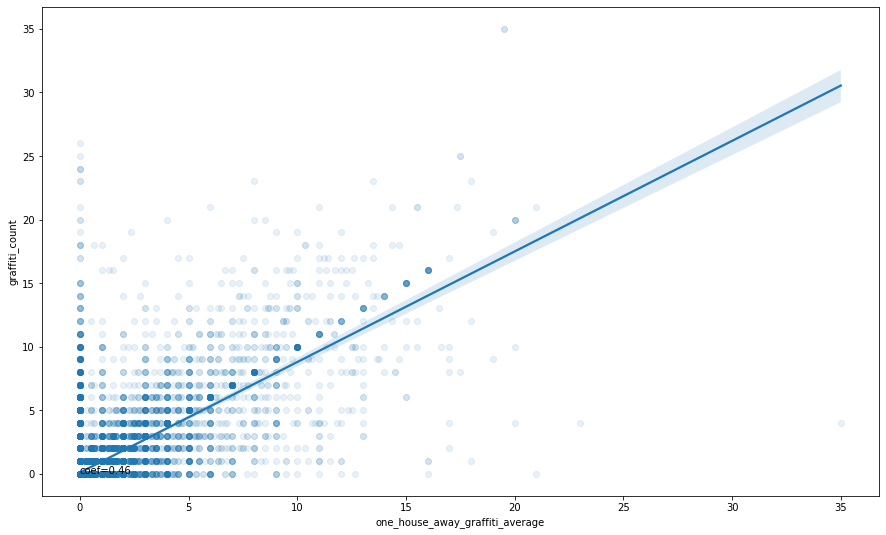

KeyboardInterrupt: 

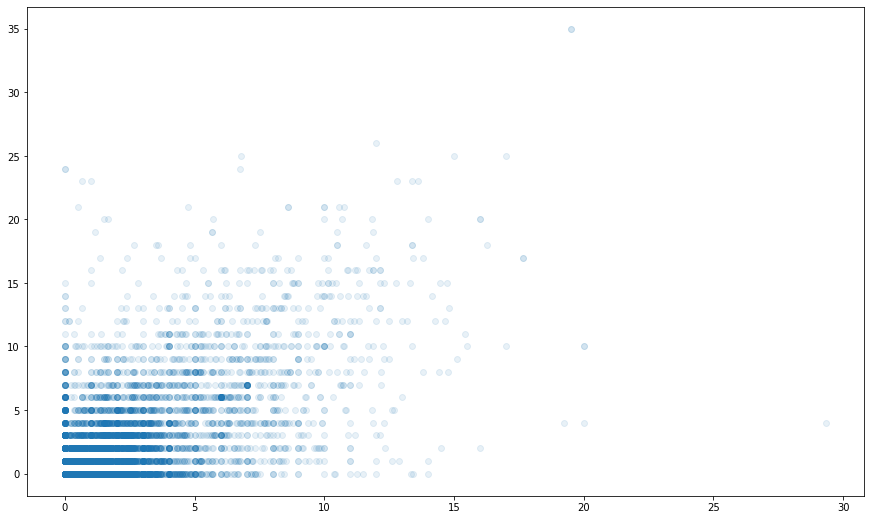

In [6]:
for i, (row_name, column_to_value) in enumerate(df_summary.iterrows()):
    x = list(df[row_name])
    y = list(df['graffiti_count'])
    plt.rcParams["figure.figsize"] = (15,9)
    sns.regplot(robust=False, fit_reg=True, x=row_name, y='graffiti_count', data=df, scatter_kws={'alpha':0.1})
    plt.text(x[-1], y[-1], f'coef={column_to_value["coef"]:.2f}')
    plt.show()

In [22]:
from utils import extract_target_feature
from sklearn.linear_model import LinearRegression

target_value = 'graffiti_count'

df = pd.read_csv('../resources/data/generated/buildings_model_features.csv')
x, y = extract_target_feature(df, target_value)

regressor = LinearRegression()

regressor.fit(x, y)
print(dict(zip(x.columns, regressor.coef_)))

{'highest_elevation_m': -0.005009333064344654, 'area_m2': 1.1080896737332125e-05, 'sub_buildings': 0.09306184328021994, 'one_house_away_buildings_count': -0.022727721709085352, 'one_house_away_graffiti_count': 0.040532942115152966, 'one_house_away_graffiti_average': 0.460451272551692, 'one_house_away_graffiti_buildings': -0.11507994716503223, 'one_house_away_buildings_average_height': -0.03248957526476733, 'one_house_away_buildings_median_height': 0.03314188027549872, 'one_house_away_buildings_total_sub_buildings': -0.00796901321547038, 'one_house_away_buildings_average_sub_buildings': -0.07603623255417755, 'one_house_away_buildings_median_sub_buildings': 0.006565417680619256, 'one_house_away_street_lights': 0.026320128118706095, 'two_houses_away_buildings_count': -0.008458622231525196, 'two_houses_away_graffiti_count': -0.014625459114821198, 'two_houses_away_graffiti_average': 0.2722304185380365, 'two_houses_away_graffiti_buildings': 0.01007573265703272, 'two_houses_away_buildings_ave

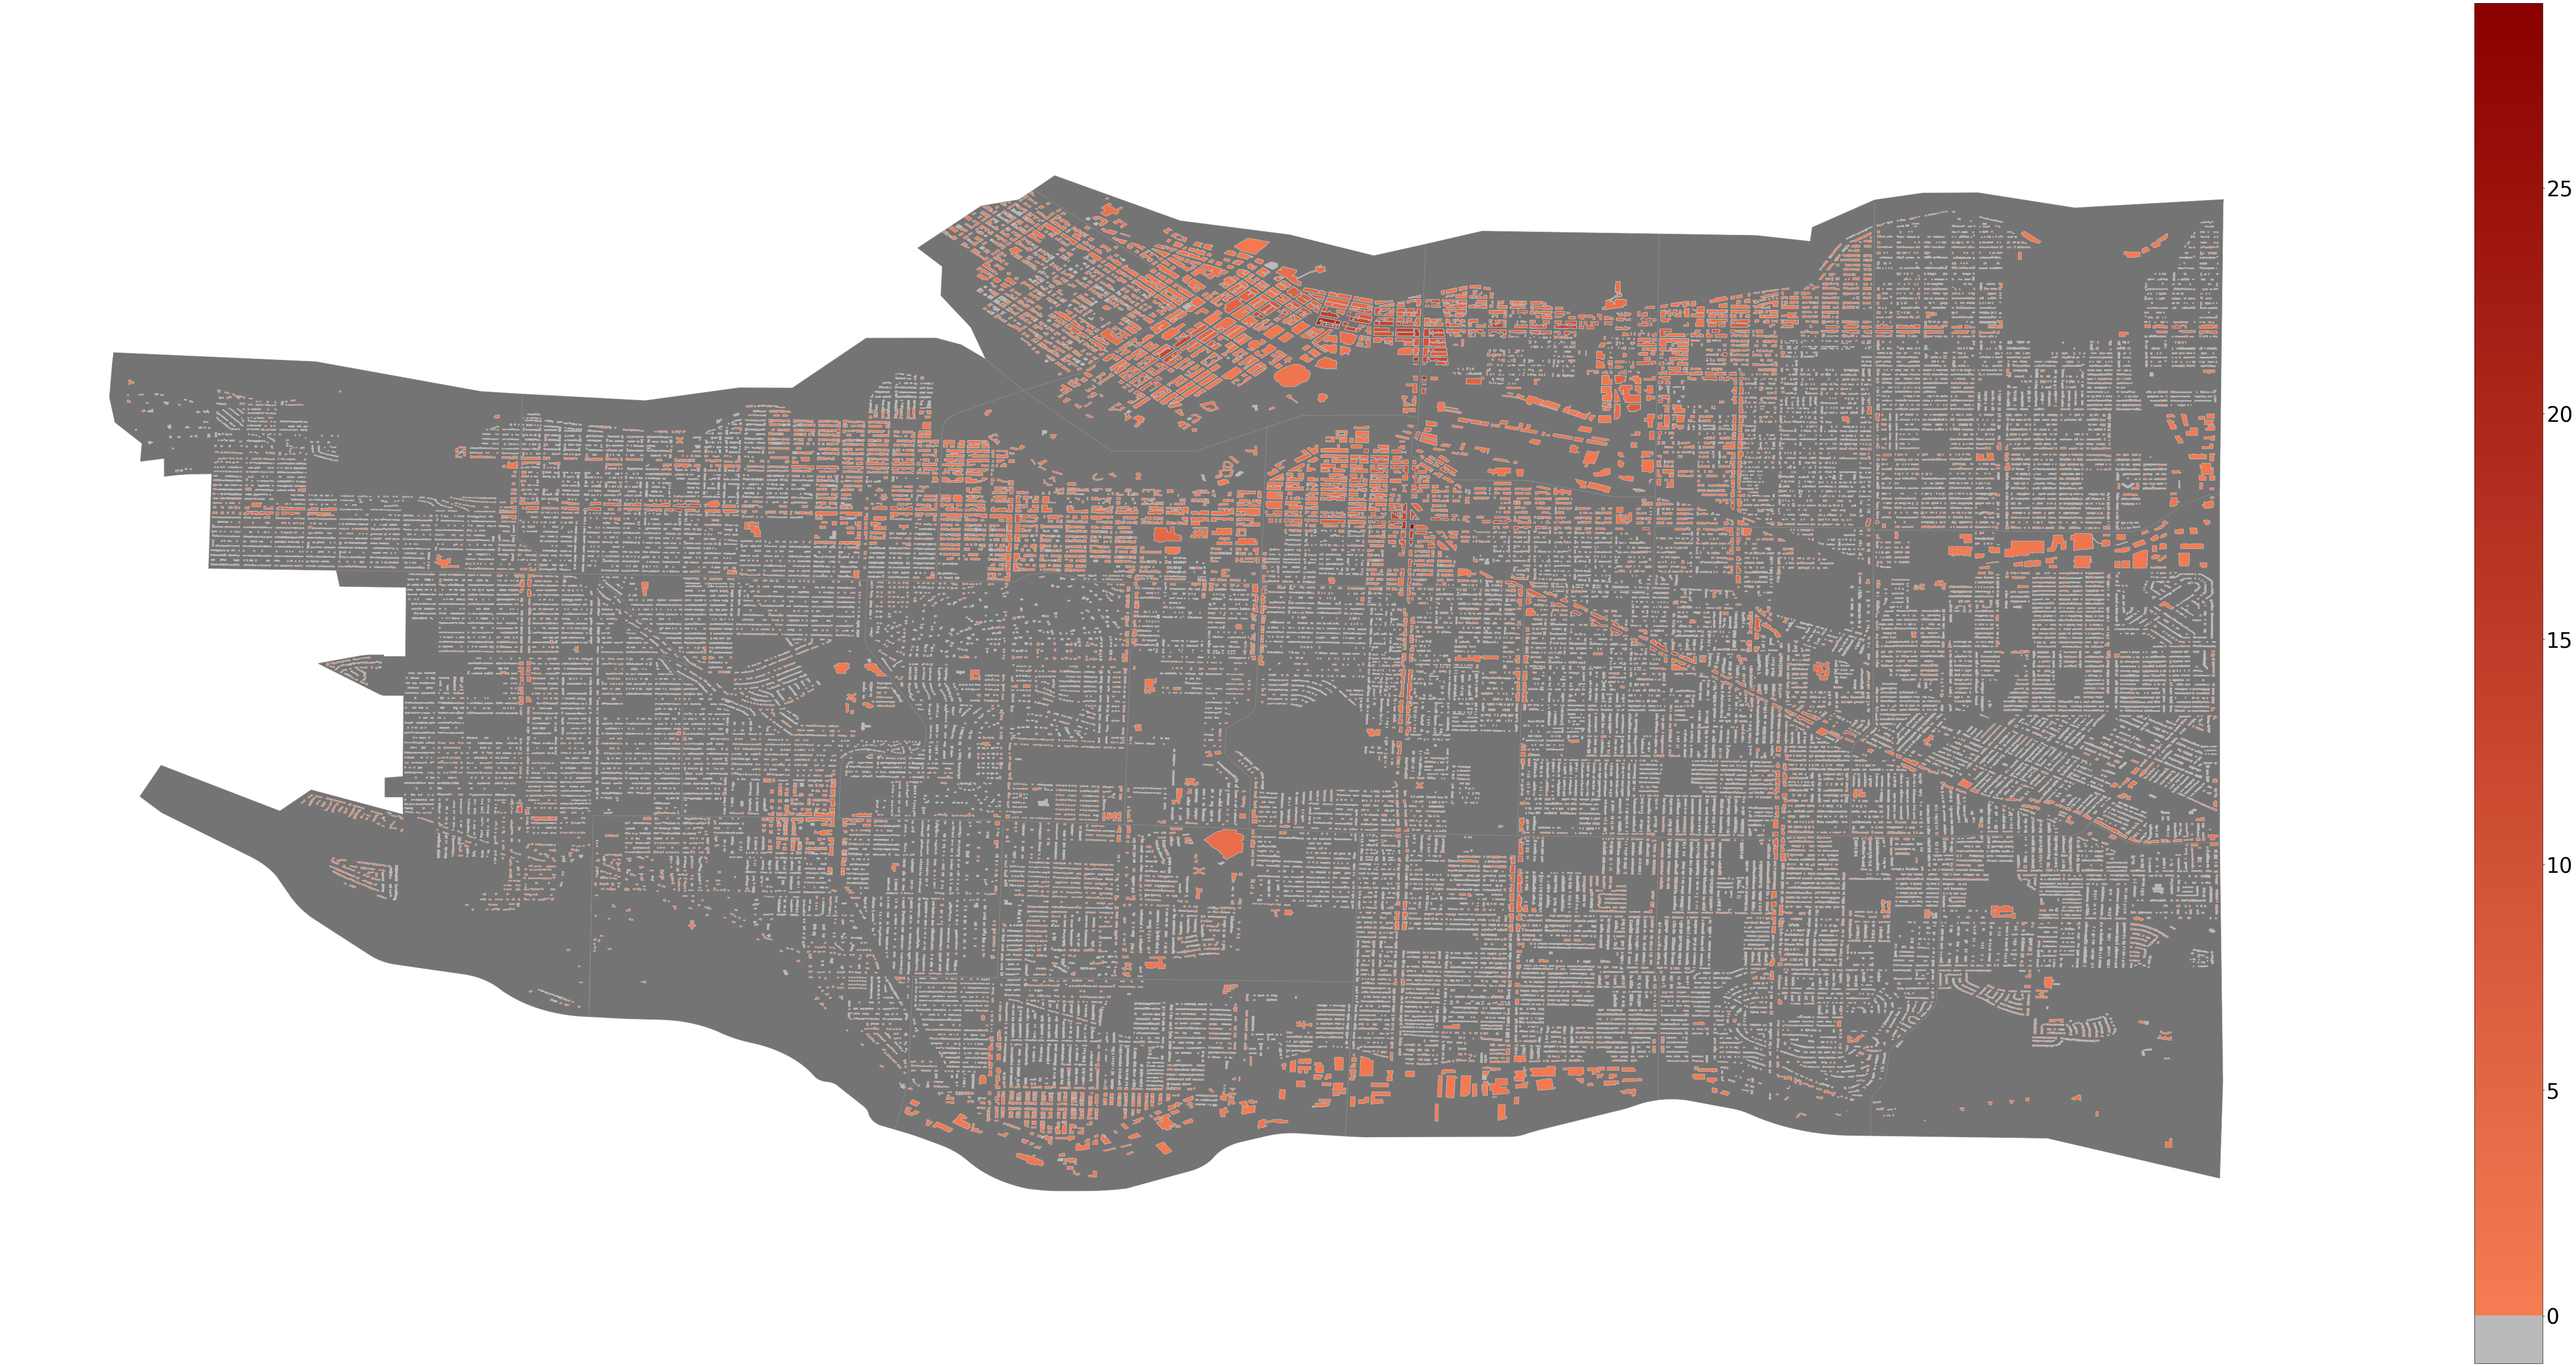

In [25]:
%matplotlib inline  

import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import shape
import json
import seaborn as sns

colours = sns.color_palette("gray", 10)

vancouver_colour = colours[4]
edge_colour = colours[5]
buildings_colour = colours[7]

width_inches = 100

vancouver = gpd.read_file('../resources/data/original/local-area-boundary.csv')
vancouver['geometry'] = [shape(json.loads(x)) for x in vancouver['Geom']]
buildings \
    = gpd.read_file('../resources/data/generated/buildings_all_features.csv')
buildings['geometry'] \
    = [shape(json.loads(x)) for x in buildings['building_polygon']]

buildings['graffiti_count'] = regressor.predict(x)

# custom colourmap
norm = matplotlib.colors.Normalize(0, buildings['graffiti_count'].max())
colors = [
    [norm(0), buildings_colour],
    [norm(0.99), buildings_colour],
    [norm(1), (246 / 255, 124 / 255, 82 / 255)],
    [norm(buildings['graffiti_count'].max()), "darkred"]
]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots()
vancouver.plot(
    ax=ax,
    edgecolor=edge_colour,
    facecolor=vancouver_colour,
    antialiased=True,
)
ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
buildings = buildings.sort_values('graffiti_count')
buildings.plot(
    ax=ax,
    edgecolor=buildings_colour,
    antialiased=True,
    column='graffiti_count',
    legend=True,
    cmap=cmap,
)

fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=40)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_difference = xlim[1] - xlim[0]
y_difference = ylim[1] - ylim[0]
fig.set_size_inches(width_inches, width_inches / x_difference * y_difference)

# plt.show()